In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import imageio


2023-08-10 12:02:31.791725: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-10 12:02:31.836896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 12:02:32.508839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


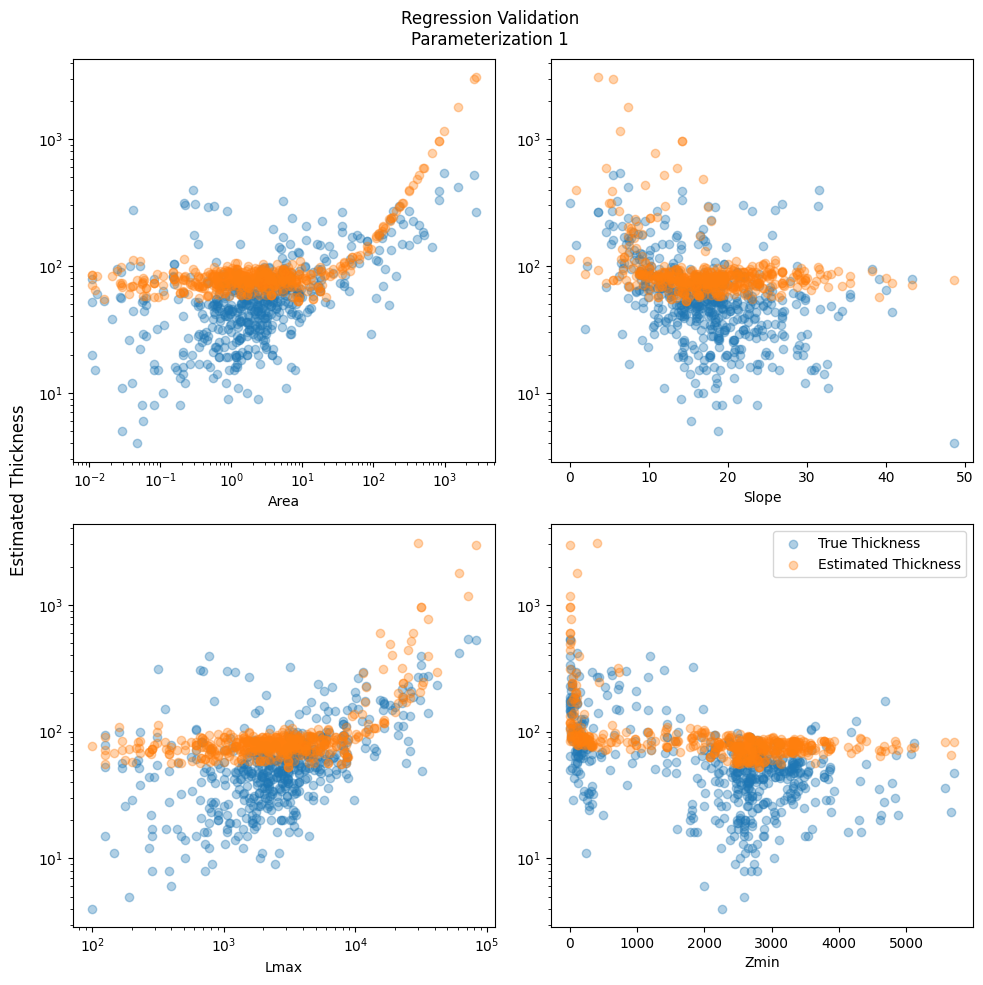

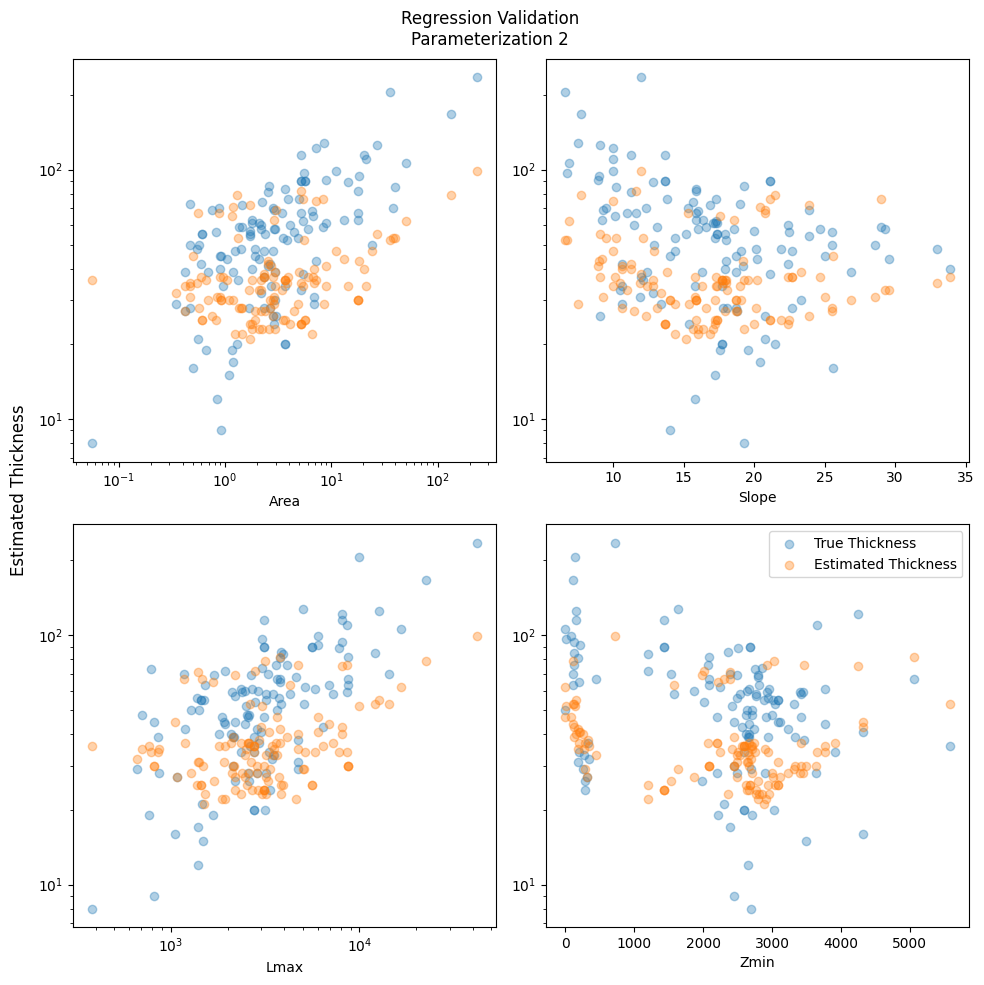

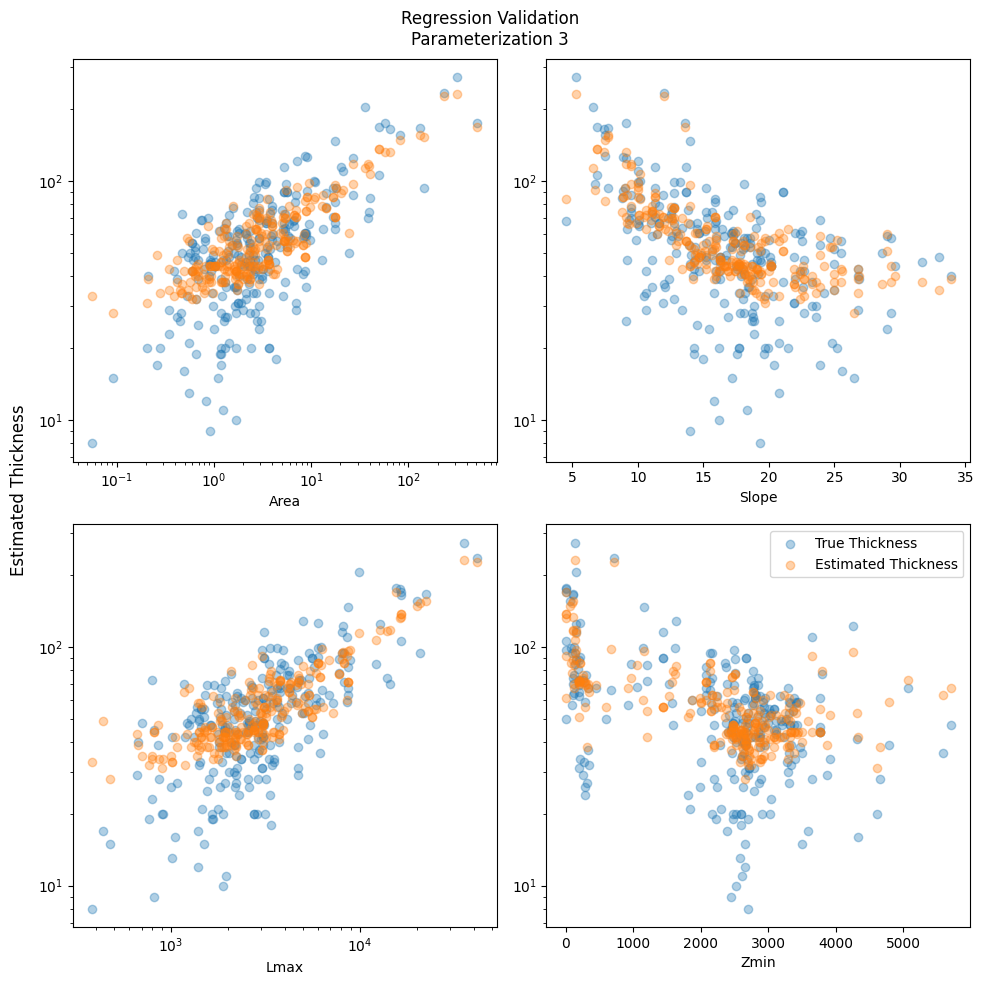

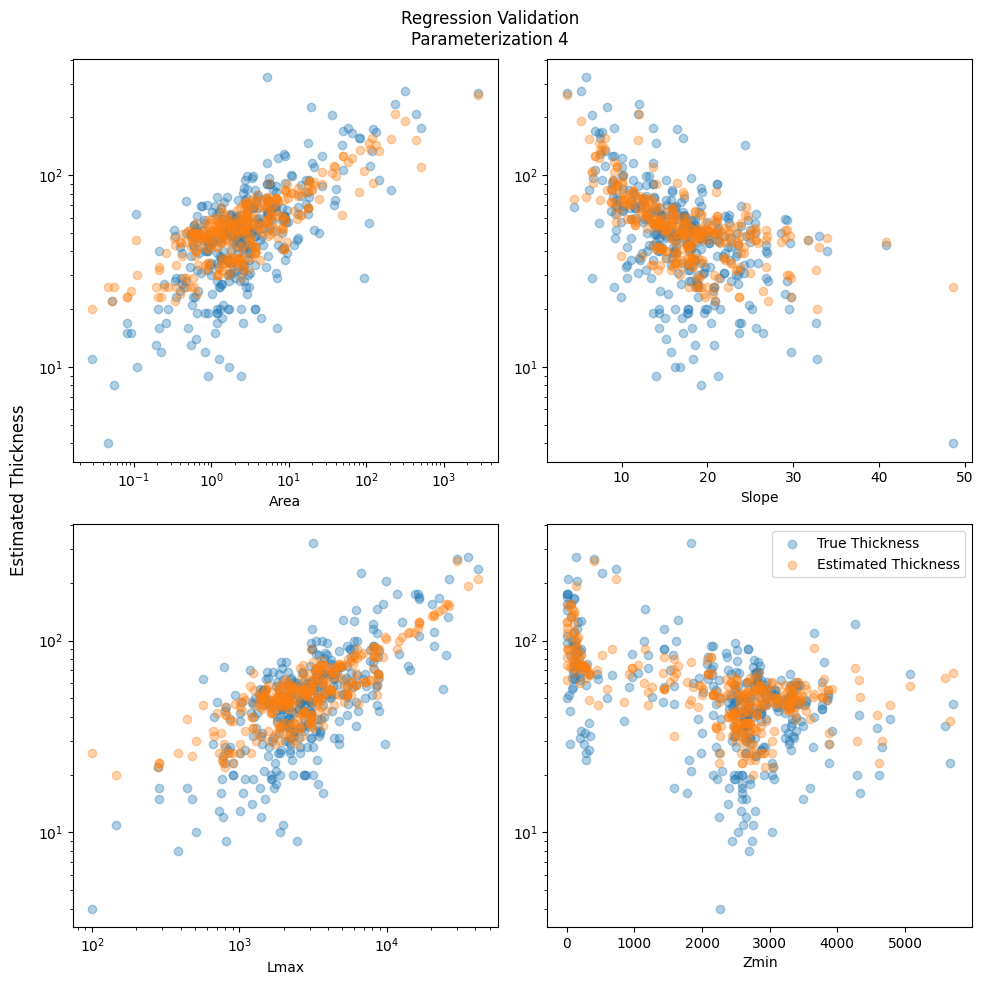

In [2]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
def make_frames():
    for j in range(1,5,1):
        p = str(j)

        df = gl.load_notebook_data(p,'first') # 0.75 threshold

        glac = gl.parameterize_data(p)
        glac = glac[['RGIId', 'Thickness']]
        data = pd.merge(df, glac, on = 'RGIId', how = 'inner')
        feat_list = ['Area','Slope','Lmax','Zmin']
        fig, axs = plt.subplots(figsize = (10,10))
        for n,i in enumerate(feat_list):
            ax = plt.subplot(2,2,n+1)
            ax.scatter(data[i],
                        data['Thickness'],
                        label='True Thickness',
                        alpha = 0.35
                       )
            ax.scatter(data[i],
                        data['WT1'],
                        label='Estimated Thickness',
                        alpha = 0.35
                       )
#             ax.scatter(
#                 data[i][data['Thickness'] == data['Thickness'].max()], 
#                 data['Thickness'].max(),
#                       marker = 'x', c = 'red'
#             )
            ax.set_xlabel(i)
            ax.set_xscale('log')
            if i == 'Slope' or i == 'Zmin':
                ax.set_xscale('linear')
            ax.set_yscale('log')
        plt.suptitle('Regression Validation\nParameterization ' + p, y = 0.98)
        fig.supylabel('Estimated Thickness')
        plt.legend(loc='best')

        plt.tight_layout()
        save_title = 'regression_validation' + p

        plt.savefig(f'img/img_{save_title}.png', 
            transparent = False,  
            facecolor = 'white'
               )
#     plt.show()
 

    
make_frames()

frames = []

for k in range(1,5,1):
    p = str(k)
    save_title = 'regression_validation' + p
    image = imageio.v2.imread(f'img/img_{save_title}.png')
    frames.append(image)
imageio.mimsave('regression_validation.gif', # output gif
            frames,          # array of input frames
            duration = 3000,
            loop = 10
           )  